### Recurrent Neural Networks

#### Notations

$$
\mathbf{x}^{(i)} =
\begin{bmatrix}
\vert   & \vert   &         & \vert   \\
x^{<1>} & x^{<2>} & \cdots  & x^{<T_{\mathbf x}>} \\
\vert   & \vert   &         & \vert   \\
\end{bmatrix}_{n \times T_{\mathbf x}}

\mathbf{y}^{(i)} =
\begin{bmatrix}
\vert   & \vert   &         & \vert   \\
y^{<1>} & y^{<2>} & \cdots  & y^{<T_{\mathbf y}>} \\
\vert   & \vert   &         & \vert   \\
\end{bmatrix}_{n \times T_{\mathbf y}}
$$

#### Forward propagation

$$
\newcommand{\lra}{\longrightarrow}
\begin{matrix}
        & \hat{y}^{<1>} &         & \hat{y}^{<2>} &         &        &             & \hat{y}^{<T_y>} \\
        & \uparrow      &         & \uparrow      &         &        &             & \uparrow        \\
a^{<0>} &               & a^{<1>} &               & a^{<2>} &        & a^{<T_x-1>} &                 \\
\lra    & f(\cdot)      & \lra    & f(\cdot)      & \lra    & \cdots & \lra        & f(\cdot)        \\\\
        & \uparrow      &         & \uparrow      &         &        &             & \uparrow        \\
        & x^{<1>}       &         & x^{<2>}       &         &        &             & x^{<T_x>}       \\
\end{matrix}
$$

$$
\begin{align*}
a^{<0>} &= \vec{0} \\
a^{<t>} &= \phi(w_{aa} \cdot a^{<t-1>} + w_{xa} \cdot x^{<t>} + b_a) \quad (\phi := \text{tanh, relu}) \\
\hat{y}^{<t>} &= \phi(w_{ay} \cdot a^{<t>} + b_y) \quad (\phi := \text{sigmoid}) \\
\end{align*}
$$

$$
\begin{align*}
{\mathbf a}^{<t>} &=
\phi\left(
    \begin{bmatrix}
        W_{n_\mathbf a \times n_\mathbf a} \vert W_{n_\mathbf a \times n_\mathbf x}
    \end{bmatrix}
    \begin{bmatrix}
        \vert \\
        \mathbf a^{<t-1>} \\
        \vert \\
        \hline
        \vert \\
        \mathbf x^{<t>} \\
        \vert
    \end{bmatrix}
    + \mathbf b
\right) \\

{\mathbf a}^{<t>} &=
\phi\left(
    \begin{bmatrix}
        W_{n_\mathbf a \times n_\mathbf a} \vert W_{n_\mathbf a \times (n_\mathbf x + 1)}
    \end{bmatrix}
    \begin{bmatrix}
        \vert \\
        \mathbf a^{<t-1>} \\
        \vert \\
        \hline
        \vert \\
        \mathbf x^{<t>} \\
        \vert \\
        \hline
        1
    \end{bmatrix}
\right)
\end{align*}
$$

#### Backpropagation

$$
\renewcommand{\lra}{\longrightarrow}
\begin{matrix}
        & \mathcal L^{<1>}(\hat{y}^{<1>}, y^{<1>}) &
        & \mathcal L^{<2>}(\hat{y}^{<2>}, y^{<2>}) &&&
        & \mathcal L^{<T_y>}(\hat{y}^{<T_y>}, y^{<T_y>}) \\

        & \uparrow      &         & \uparrow      &         &        &             & \uparrow        \\
        & \hat{y}^{<1>} &         & \hat{y}^{<2>} &         &        &             & \hat{y}^{<T_y>} \\
        & \uparrow      &         & \uparrow      &         &        &             & \uparrow        \\
a^{<0>} &               & a^{<1>} &               & a^{<2>} &        & a^{<T_x-1>} &                 \\
\lra    & f(\cdot)      & \lra    & f(\cdot)      & \lra    & \cdots & \lra        & f(\cdot)        \\\\
        & \uparrow      &         & \uparrow      &         &        &             & \uparrow        \\
        & x^{<1>}       &         & x^{<2>}       &         &        &             & x^{<T_x>}       \\
\end{matrix}
$$

##### Backpropagation through time

$$
\begin{align*}
\mathcal{L}^{<t>}(\hat{y}^{<t>}, y^{<t>}) &= -y^{<t>}\log\hat{y}^{<t>} - (1-y^{<t>})\log(1-\hat{y}^{<t>}) \\
\mathcal{L}(\mathbf{\hat{y}}^{(i)}, \mathbf y^{(i)}) &= \sum_{t=1}^{T_y} \mathcal{L}^{<t>}(\hat{y}^{<t>}, y^{<t>})
\end{align*}
$$

### Type of RNNs

<img src="src/rnn_types.png" height="300px" />

1:1 is almost the same as a basic neural network. As the sequence goes by, the culminated information ($a$) helps you predict the answer ($y$).

### Language modeling with RNNs

One basic way to create a dataset:\
replace the out of vocabularies (OOVs) as `<UNK>` token.

```
       The   Egyptian   Mau   is   a   breed   of   cat   .
<CLS> <The> <Egyptian> <UNK> <is> <a> <breed> <of> <cat> <.> <EOS> <PAD> <PAD> <PAD> <PAD> <PAD>
```

### Sequence generation

$$
\renewcommand{\lra}{\longrightarrow}
\begin{matrix}
        & \hat{y}^{<1>} &         & \hat{y}^{<2>} &         &        &             & \hat{y}^{<T_y>}  \\
        & \uparrow      &         & \uparrow      &         &        &             & \uparrow         \\
\vec{0} &               & a^{<1>} &               & a^{<2>} &        & a^{<T_x-1>} &                  \\
\lra    & f(\cdot)      & \lra    & f(\cdot)      & \lra    & \cdots & \lra        & f(\cdot)         \\\\
        & \uparrow      &         & \uparrow      &         &        &             & \uparrow         \\
        & \vec{0}       &         & \hat{y}^{<1>} &         &        &             & \hat{y}^{<T_x-1>}\\
\end{matrix}
$$

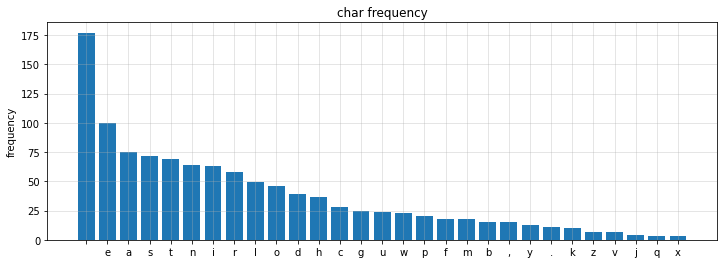

' ,.abcdefghijklmnopqrstuvwxyz'

In [208]:
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re

text = """John quickly realized that the fox was jumping over a brown fence. Meanwhile, the lazy dog slept under the warm sun, dreaming of chasing squirrels in the park. A wizard in a distant land cast spells to levitate objects and summon mystical creatures. The gym was full of athletes lifting weights, running on treadmills, and practicing yoga poses. Buzzing bees were collecting nectar from vibrant flowers, while a group of birds sang harmoniously from the treetops. In the city, cars zoomed by as people hurried to work, their minds filled with tasks and deadlines. The library was a sanctuary of knowledge, where students pored over books and researchers delved into ancient manuscripts. A chef in a bustling kitchen prepared exquisite dishes, skillfully chopping vegetables and grilling meats. At the beach, waves crashed against the shore as children built sandcastles and surfers rode the swells. In the forest, a lumberjack wielded his axe, cutting down trees for timber. The night sky was a tapestry of stars, constellations, and planets, inspiring wonder and awe in all who gazed upon it."""

text = text.lower()
char_count = dict(sorted(Counter(text).items(), key=lambda x: x[1], reverse=True))

fig, ax = plt.subplots(1,1,figsize=(12, 4))
ax.set_title('char frequency')
ax.bar(*zip(*char_count.items()))
ax.set_ylabel('frequency')
ax.grid(alpha=.4)
plt.show()

chars = ''.join(sorted(char_count.keys()))

c2i = lambda c: chars.index(c)
i2c = lambda i: chars[i]

chars

In [209]:
def splitter(text, delim="\."):
    split_text = re.split(f'({delim})', text)
    return [(split_text[i] + split_text[i+1]).strip() for i in range(0, len(split_text)-1, 2)]

sentences = splitter(text)

unigrams = []
for sentence in sentences:
    for i in range(len(sentence)):
        unigrams.append([sentence[i]])
print(f"{unigrams = }")

bigrams = []
for sentence in sentences:
    for i in range(len(sentence)-1):
        bigrams.append([sentence[i], sentence[i+1]])
print(f"{bigrams  = }")

trigrams = []
for sentence in sentences:
    for i in range(len(sentence)-2):
        trigrams.append([sentence[i], sentence[i+1], sentence[i+2]])
print(f"{trigrams = }")

unigrams = [['j'], ['o'], ['h'], ['n'], [' '], ['q'], ['u'], ['i'], ['c'], ['k'], ['l'], ['y'], [' '], ['r'], ['e'], ['a'], ['l'], ['i'], ['z'], ['e'], ['d'], [' '], ['t'], ['h'], ['a'], ['t'], [' '], ['t'], ['h'], ['e'], [' '], ['f'], ['o'], ['x'], [' '], ['w'], ['a'], ['s'], [' '], ['j'], ['u'], ['m'], ['p'], ['i'], ['n'], ['g'], [' '], ['o'], ['v'], ['e'], ['r'], [' '], ['a'], [' '], ['b'], ['r'], ['o'], ['w'], ['n'], [' '], ['f'], ['e'], ['n'], ['c'], ['e'], ['.'], ['m'], ['e'], ['a'], ['n'], ['w'], ['h'], ['i'], ['l'], ['e'], [','], [' '], ['t'], ['h'], ['e'], [' '], ['l'], ['a'], ['z'], ['y'], [' '], ['d'], ['o'], ['g'], [' '], ['s'], ['l'], ['e'], ['p'], ['t'], [' '], ['u'], ['n'], ['d'], ['e'], ['r'], [' '], ['t'], ['h'], ['e'], [' '], ['w'], ['a'], ['r'], ['m'], [' '], ['s'], ['u'], ['n'], [','], [' '], ['d'], ['r'], ['e'], ['a'], ['m'], ['i'], ['n'], ['g'], [' '], ['o'], ['f'], [' '], ['c'], ['h'], ['a'], ['s'], ['i'], ['n'], ['g'], [' '], ['s'], ['q'], ['u'], ['i'], ['r'], [

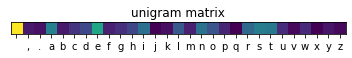

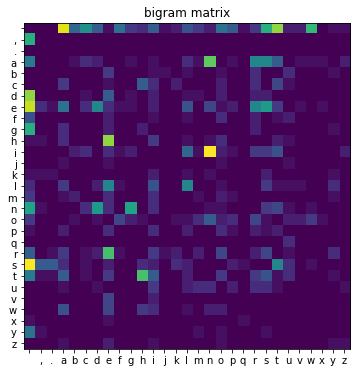

In [210]:
import plotly.graph_objects as go

def ngram_matrix(ngrams):
    assert len(ngrams) > 0
    dim = len(ngrams[0])
    matrix = np.zeros([len(chars)]*dim)
    for ngram in ngrams:
        matrix[tuple(map(c2i, ngram))] += 1
    return matrix

plt.figure(figsize=(6,6))
plt.title("unigram matrix")
plt.imshow(ngram_matrix(unigrams).reshape(1,-1))
plt.xticks(range(len(chars)), list(chars))
plt.yticks([])
plt.show()

plt.figure(figsize=(6,6))
plt.title("bigram matrix")
plt.imshow(ngram_matrix(bigrams))
plt.xticks(range(len(chars)), list(chars))
plt.yticks(range(len(chars)), list(chars))
plt.show()

# Create a 5x5x5 array filled with random values
data = ngram_matrix(trigrams)
data = np.log(data + 1e-8)

# Create x, y, z coordinates
x, y, z = np.indices(data.shape)

# Create a 3D scatter plot
fig = go.Figure(data=go.Scatter3d(
    x=x.flatten(),
    y=y.flatten(),
    z=z.flatten(),
    mode='markers',
    marker=dict(
        size=8,
        color=data.flatten(),  # set color to an array/list of desired values
        colorscale='Viridis',  # choose a colorscale
        opacity=0.1
    ),
))

# Update plot layout
fig.update_layout(
    margin=dict(l=0, r=0, b=0, t=0),
    scene=dict(
        xaxis=dict(range=[0, len(chars)], tickvals=list(range(len(chars))), ticktext=list(chars)),
        yaxis=dict(range=[0, len(chars)], tickvals=list(range(len(chars))), ticktext=list(chars)),
        zaxis=dict(range=[0, len(chars)], tickvals=list(range(len(chars))), ticktext=list(chars))
    )
)

fig.show()

In [211]:
unigram_matrix = ngram_matrix(unigrams)
bigram_matrix = ngram_matrix(bigrams)
trigram_matrix = ngram_matrix(trigrams)

sequence = []
for _ in range(100):
    if len(sequence) == 0:
        while True:
            p = unigram_matrix
            p = p / p.sum()
            c = np.random.choice(list(chars), p=p)
            if c not in " ,.":
                break
    elif len(sequence) == 1:
        i = c2i(sequence[-1])
        p = bigram_matrix[i]
        p = p / p.sum()
        c = np.random.choice(list(chars), p=p)
    else:
        i, j = c2i(sequence[-2]), c2i(sequence[-1])
        p = trigram_matrix[i,j]
        p = p / p.sum()
        c = np.random.choice(list(chars), p=p)
    
    sequence.append(c)
    if c == '.':
        break

print(''.join(sequence))

ees, atestat sks sumbeat topledgetarche wite ing weight surrelly woniously dis ands thles aga wielve


### Embedding


#### Skip-gram

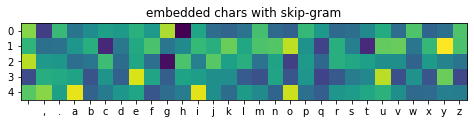

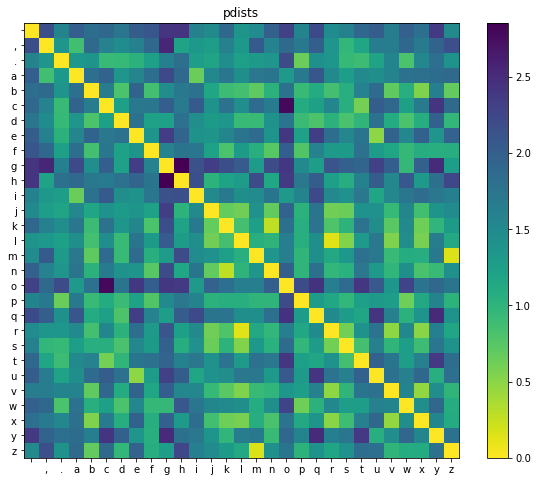

In [212]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader

X = []
context_size = 2
for sentence in sentences:
    for i in range(context_size, len(sentence)-context_size):
        for offset in range(-context_size, context_size+1):
            if offset == 0:
                continue
            X.append([c2i(sentence[i]), c2i(sentence[i+offset])])

class SkipGram(nn.Module):
    def __init__(self, vocab_size=len(chars), embedding_dim=5):
        super().__init__()
        self.vocab_size = vocab_size
        self.embedding_dim = embedding_dim

        self.embedding = nn.Embedding(num_embeddings=self.vocab_size,
                                      embedding_dim=self.embedding_dim)
        self.linear = nn.Linear(in_features=self.embedding_dim,
                                out_features=self.vocab_size)
        
        nn.init.xavier_uniform_(self.embedding.weight)
        nn.init.xavier_uniform_(self.linear.weight)
    
    def forward(self, x):
        x = self.embedding(x)
        x = self.linear(x)
        return x

skipgram = SkipGram()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(skipgram.parameters(), lr=0.1)

skipgram.train()
for e in range(200):
    running_loss = 0
    count = 0
    for x, y in DataLoader(X, batch_size=32, shuffle=True):
        count += 1
        optimizer.zero_grad()

        y_hat = skipgram(x)
        loss = criterion(y_hat, y)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    print(f"[epoch {e+1:0>3}] {running_loss/count:7.5f}", end='\r')

plt.figure(figsize=(8,4))
plt.title('embedded chars with skip-gram')

embedded_chars = skipgram.embedding(torch.arange(0, skipgram.vocab_size)).detach().numpy()
plt.imshow(embedded_chars.T)

plt.xticks(range(len(chars)), list(chars))
plt.yticks(range(skipgram.embedding_dim))
plt.show()

plt.figure(figsize=(10,8))
plt.title('pdists')
plt.imshow(torch.cdist(torch.tensor(embedded_chars), torch.tensor(embedded_chars)), cmap='viridis_r')
plt.xticks(range(len(chars)), list(chars))
plt.yticks(range(len(chars)), list(chars))
plt.colorbar()
plt.show()

#### CBOW (continuous bag of words)

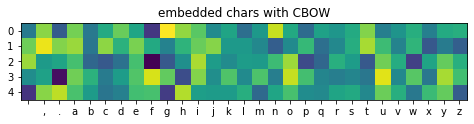

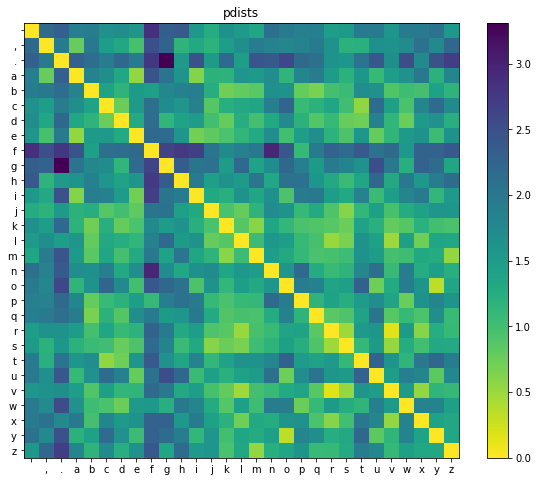

In [213]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader

X = []
context_size = 2
for sentence in sentences:
    for i in range(context_size, len(sentence)-context_size):
        for offset in range(-context_size, context_size+1):
            if offset == 0:
                continue
            X.append([c2i(sentence[i+offset]), c2i(sentence[i])])

class CBOW(nn.Module):
    def __init__(self, vocab_size=len(chars), embedding_dim=5):
        super().__init__()
        self.vocab_size = vocab_size
        self.embedding_dim = embedding_dim

        self.embedding = nn.Embedding(num_embeddings=self.vocab_size,
                                      embedding_dim=self.embedding_dim)
        self.linear = nn.Linear(in_features=self.embedding_dim,
                                out_features=self.vocab_size)
        
        nn.init.xavier_uniform_(self.embedding.weight)
        nn.init.xavier_uniform_(self.linear.weight)
    
    def forward(self, x):
        x = self.embedding(x)
        x = self.linear(x)
        return x

cbow = CBOW()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(cbow.parameters(), lr=0.1)

cbow.train()
for e in range(200):
    running_loss = 0
    count = 0
    for x, y in DataLoader(X, batch_size=32, shuffle=True):
        count += 1
        optimizer.zero_grad()

        y_hat = cbow(x)
        loss = criterion(y_hat, y)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    print(f"[epoch {e+1:0>3}] {running_loss/count:7.5f}", end='\r')

plt.figure(figsize=(8,4))
plt.title('embedded chars with CBOW')

embedded_chars = cbow.embedding(torch.arange(0, cbow.vocab_size)).detach().numpy()
plt.imshow(embedded_chars.T)

plt.xticks(range(len(chars)), list(chars))
plt.yticks(range(cbow.embedding_dim))
plt.show()

plt.figure(figsize=(10,8))
plt.title('pdists')
plt.imshow(torch.cdist(torch.tensor(embedded_chars), torch.tensor(embedded_chars)), cmap='viridis_r')
plt.xticks(range(len(chars)), list(chars))
plt.yticks(range(len(chars)), list(chars))
plt.colorbar()
plt.show()

RNN cells are not designed for parallelization. The only way is to create a batch.

- 'Batch first' $(B,T,n_\mathbf x)$ is more human readable
- 'Time first' $(T,B,n_\mathbf x)$ is easier for parallelization

In [214]:
# RNNCell

import numpy as np
import time

X  = np.random.randn(128, 48, 4)    # (b,t,n_x) batch, time, xdim -> batch first
Y  = np.random.randn(128, 48, 1000) # (b,t,n_y) batch, time, ydim
hx = np.zeros((128, 2))             # (b,  n_x) batch, time(single) which is omitted, hxdim

print(f"batch first: {X.shape}")
print(f"time first:  {X.transpose((1,0,2)).shape}")
print()

# time first
X = X.transpose((1,0,2))
Y = Y.transpose((1,0,2))

w_xh = np.random.randn(2, 4) * 0.01
w_hh = np.random.randn(2, 2) * 0.01
w_hy = np.random.randn(1000, 2) * 0.01

b_xh = np.random.randn(2, 1) * 0.01
b_hh = np.random.randn(2, 1) * 0.01
b_hy = np.random.randn(1000, 1) * 0.01

def cross_entropy_loss(y_pred, y_true):
    y_pred = np.clip(y_pred, 1e-15, 1-1e-15) # log(0)
    loss = -np.sum(y_true * np.log(y_pred)) / y_true.shape[0]
    return loss

# epoch
for e in range(10):

    # time
    loss = 0
    for t, (x_batched, y_batched) in enumerate(zip(X, Y)):
        z1 = w_xh @ x_batched.T + b_xh # (n_hx, n_x ) @ (n_x, b) + (n_x, 1)
        z2 = w_hh @ hx.T + b_hh        # (n_hx, n_hx) @ (n_hx,b) + (n_hx,1)
        z = z1 + z2                    # (n_hx, b)
        hx = z.T                       # (b, n_hx)

        z = w_hy @ z + b_hy            # (n_y,  n_hx) @ (n_hx,b) + (n_y, 1)
        y_hat_batched = z.T

        y_batched     = np.exp(y_batched)
        y_batched     = y_batched / y_batched.sum(axis=1, keepdims=True)

        y_hat_batched = np.exp(y_hat_batched)
        y_hat_batched = y_hat_batched / y_hat_batched.sum(axis=1, keepdims=True)

        for b, (y_hat, y) in enumerate(zip(y_hat_batched, y_batched)):
            loss += cross_entropy_loss(y_hat, y)

        loss /= 128 # batch loss of single time step
        # loss.backward()
        # optimizer.step()

        print(f"[epoch {e+1:>3}][time {t+1:>3}]", end='\r')
        time.sleep(.01)
        

batch first: (128, 48, 4)
time first:  (48, 128, 4)



### GRU

"overcome the vanishing gradient problem!"

The default RNN way to calculate hidden state $\mathbf a^{<t>}$ (or in this case $\mathbf c^{<t>}$) from the previous state $\mathbf a^{<t-1>}$ is:
$$
\mathbf c^{<t>} =
\tanh
(
    W_c
    \begin{bmatrix}
        \mathbf c^{<t-1>} \\
        \hline
        \mathbf x^{<t>} \\
    \end{bmatrix}
    + \mathbf b_c
)
$$

But, we do not know if $\mathbf x^{<t>}$ is informative enough to update $\mathbf c^{<t>}$ directly. Thus, we decide to put a gate $\Gamma_u^{<t>}$ to check the informativeness with a probability between $(0,1)$ using $\sigma(\cdot)$ for each $n_{\mathbf c}$. Each informativeness is provided with elementwise product ($\odot$). Additionally, we will have a resetable (forgettable) gate $\Gamma_r^{<t>}$ for the previous hidden state $\mathbf c^{<t-1>}$.

<hr>


We first set the value $\tilde{\mathbf c}^{<t>}$, assuming that the current $\mathbf x^{<t>}$ is informative enough as below. (same as before)

$$
\tilde{\mathbf c}^{<t>} =
\tanh
(
    W_c
    \begin{bmatrix}
        \mathbf c^{<t-1>} \\
        \hline
        \mathbf x^{<t>} \\
    \end{bmatrix}
    + \mathbf b_c
)
$$

We will slightly add an ability to reset (forget) $\mathbf c^{<t-1>}$ with $\Gamma_r^{<r>}$ and update the previous formula.

$$
\begin{align}
\Gamma_r^{<t>} &=
\sigma
(
    W_r
    \begin{bmatrix}
        \mathbf c^{<t-1>} \\
        \hline
        \mathbf x^{<t>} \\
    \end{bmatrix}
    + \mathbf b_r
)\\

\tilde{\mathbf c}^{<t>} &=
\tanh
(
    W_c
    \begin{bmatrix}
        \Gamma_r^{<t>} \odot \mathbf c^{<t-1>} \\
        \hline
        \mathbf x^{<t>} \\
    \end{bmatrix}
    + \mathbf b_c
)
\end{align}
$$

If we think the current $\mathbf x^{<t>}$ is less informative, we will not update the hidden state and keep the last $\mathbf c^{<t-1>}$.

We calculate the informativeness with a gate $\Gamma_u$ using $\mathbf c^{<t-1>}$ and $\mathbf x^{<t>}$. ($u$ is for update)

$\Gamma_u$ is a $n_\mathbf c$ sized vector which lies on $(0,1)$ to indicate each dimension's informativeness - more precisely, an informativeness of $\tilde{\mathbf c}^{<t>}$.

$$
\Gamma_u =
\sigma
(
    W_u
    \begin{bmatrix}
        \mathbf c^{<t-1>} \\
        \hline
        \mathbf x^{<t>} \\
    \end{bmatrix}
    + \mathbf b_u
)
$$

Now we obtain the <b>real</b> hidden state $\mathbf c^{<t>}$.

$$
\mathbf c^{<t>} = \Gamma_u \odot \tilde{\mathbf c}^{<t>} + (1 - \Gamma_u) \odot \mathbf c^{<t-1>}
$$

<hr>

GRU

$$
\begin{align}
\Gamma_u^{<t>} &=
\sigma
(
    W_u
    \begin{bmatrix}
        \mathbf c^{<t-1>} \\
        \hline
        \mathbf x^{<t>} \\
    \end{bmatrix}
    + \mathbf b_u
)\\

\Gamma_r^{<t>} &=
\sigma
(
    W_r
    \begin{bmatrix}
        \mathbf c^{<t-1>} \\
        \hline
        \mathbf x^{<t>} \\
    \end{bmatrix}
    + \mathbf b_r
)\\

\tilde{\mathbf c}^{<t>} &=
\tanh
(
    W_c
    \begin{bmatrix}
        \Gamma_r^{<t>} \odot \mathbf c^{<t-1>} \\
        \hline
        \mathbf x^{<t>} \\
    \end{bmatrix}
    + \mathbf b_c
)\\

\\
\hat{\mathbf y}^{<t>} = \mathbf c^{<t>} &= \Gamma_u \odot \tilde{\mathbf c}^{<t>} + (1 - \Gamma_u) \odot \mathbf c^{<t-1>} \\
\end{align}
$$

LSTM
 
$$
\begin{align}
\Gamma_u^{<t>} &=
\sigma
(
    W_u
    \begin{bmatrix}
        \mathbf a^{<t-1>} \\
        \hline
        \mathbf x^{<t>} \\
    \end{bmatrix}
    + \mathbf b_u
)\\

\Gamma_f^{<t>} &=
\sigma
(
    W_f \cdot
    \begin{bmatrix}
        \mathbf a^{<t-1>} \\
        \hline
        \mathbf x^{<t>} \\
    \end{bmatrix}
    + \mathbf b_f
)\\

\Gamma_o^{<t>} &=
\sigma
(
    W_o
    \begin{bmatrix}
        \mathbf a^{<t-1>} \\
        \hline
        \mathbf x^{<t>} \\
    \end{bmatrix}
    + \mathbf b_o
)\\

\tilde{\mathbf c}^{<t>} &=
\tanh
(
    W_c
    \begin{bmatrix}
        \mathbf a^{<t-1>} \\
        \hline
        \mathbf x^{<t>} \\
    \end{bmatrix}
    + \mathbf b_c
)\\

\mathbf c^{<t>} &= \Gamma_u \odot \tilde{\mathbf c}^{<t>} + \Gamma_f \odot \mathbf c^{<t-1>} \\
\hat{\mathbf y}^{<t>} = \mathbf a^{<t>} &= \Gamma_o \odot \tanh(\mathbf c^{<t>}) \\
\end{align}
$$

LSTM + peephole connection
 
$$
\begin{align}
\Gamma_u^{<t>} &=
\sigma
(
    W_u
    \begin{bmatrix}
        \mathbf a^{<t-1>} \\
        \hline
        \mathbf c^{<t-1>} \\
        \hline
        \mathbf x^{<t>} \\
    \end{bmatrix}
    + \mathbf b_u
)\\

\Gamma_f^{<t>} &=
\sigma
(
    W_f
    \begin{bmatrix}
        \mathbf a^{<t-1>} \\
        \hline
        \mathbf c^{<t-1>} \\
        \hline
        \mathbf x^{<t>} \\
    \end{bmatrix}
    + \mathbf b_f
)\\

\Gamma_o^{<t>} &=
\sigma
(
    W_o
    \begin{bmatrix}
        \mathbf a^{<t-1>} \\
        \hline
        \mathbf c^{<t-1>} \\
        \hline
        \mathbf x^{<t>} \\
    \end{bmatrix}
    + \mathbf b_o
)\\

\tilde{\mathbf c}^{<t>} &=
\tanh
(
    W_c
    \begin{bmatrix}
        \mathbf a^{<t-1>} \\
        \hline
        \mathbf x^{<t>} \\
    \end{bmatrix}
    + \mathbf b_c
)\\

\mathbf c^{<t>} &= \Gamma_u \odot \tilde{\mathbf c}^{<t>} + \Gamma_f \odot \mathbf c^{<t-1>} \\
\hat{\mathbf y}^{<t>} = \mathbf a^{<t>} &= \Gamma_o \odot \tanh(\mathbf c^{<t>}) \\
\end{align}
$$

$\Gamma_u$, $1-\Gamma_u$ of GRU is similar to $\Gamma_u$, $\Gamma_f$ of LSTM.

Here are some variations of GRUs.

<img src="https://upload.wikimedia.org/wikipedia/commons/3/37/Gated_Recurrent_Unit%2C_base_type.svg" height="200px" />
<img src="https://upload.wikimedia.org/wikipedia/commons/a/ac/Gated_Recurrent_Unit%2C_type_1.svg" height="200px" />
<img src="https://upload.wikimedia.org/wikipedia/commons/b/bf/Gated_Recurrent_Unit%2C_type_2.svg" height="200px" />
<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Gated_Recurrent_Unit%2C_type_3.svg" height="200px" />

Typical LSTM cell.

<img src="src/lstm.png" height="400px" />

### Bidirectional RNN

Getting information from the future!

$$
\hat{\mathbf y}^{<t>} = \phi(
    W_y
    \begin{bmatrix}
    \vert \\
    \mathbf a_{\text{forward}}^{<t>}\\
    \vert \\
    \hline
    \vert \\
    \mathbf a_{\text{backward}}^{<t>} \\
    \vert
    \end{bmatrix}
    + \mathbf b_y
)
$$

<img src="src/brnn.png" height="400px" />

### Deep RNN

$$
\renewcommand{\lra}{\longrightarrow}
\begin{matrix}
          & \hat{y}^{<1>} &           & \hat{y}^{<2>} &           &        &               & \hat{y}^{<T_y>} \\
          & \uparrow      &           & \uparrow      &           &        &               & \uparrow        \\
a^{[n]<0>}&               & a^{[n]<1>}&               & a^{[n]<2>}&        & a^{[n]<T_x-1>}&                 \\
\lra      & f^{[n]}(\cdot)& \lra      & f^{[n]}(\cdot)& \lra      & \cdots & \lra          & f^{[n]}(\cdot)  \\\\
          & \uparrow      &           & \uparrow      &           &        &               & \uparrow        \\
          & \vdots        &           & \vdots        &           & \vdots &               & \vdots          \\
          & \uparrow      &           & \uparrow      &           &        &               & \uparrow        \\
a^{[2]<0>}&               & a^{[2]<1>}&               & a^{[2]<2>}&        & a^{[2]<T_x-1>}&                 \\
\lra      & f^{[2]}(\cdot)& \lra      & f^{[2]}(\cdot)& \lra      & \cdots & \lra          & f^{[2]}(\cdot)  \\\\
          & \uparrow      &           & \uparrow      &           &        &               & \uparrow        \\
a^{[1]<0>}&               & a^{[1]<1>}&               & a^{[1]<2>}&        & a^{[1]<T_x-1>}&                 \\
\lra      & f^{[1]}(\cdot)& \lra      & f^{[1]}(\cdot)& \lra      & \cdots & \lra          & f^{[1]}(\cdot)  \\\\
          & \uparrow      &           & \uparrow      &           &        &               & \uparrow        \\
          & x^{<1>}       &           & x^{<2>}       &           &        &               & x^{<T_x>}       \\
\end{matrix}
$$


x_batched.shape = torch.Size([8, 10, 1])
y_batched.shape = torch.Size([8, 10, 2])


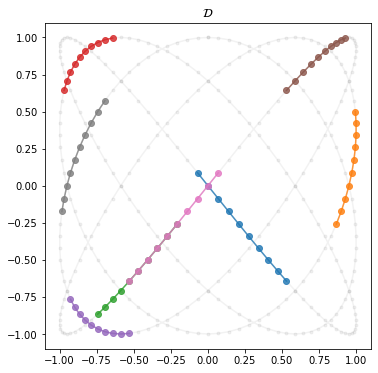

In [258]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader

x = torch.linspace(0, torch.pi*2, 361)
y = torch.stack([torch.sin(x*4), torch.cos(x*5)], axis=1)

plt.figure(figsize=(6,6))
plt.title(r'$\mathcal{D}$')
plt.plot(*y.T, marker='.', alpha=.1, color='grey')
plt.axis('square')

input_size  = 1   # Number of features in the input
hidden_size = 20  # Number of features in the hidden state
output_size = 2   # Number of features in the output
batch_size  = 16  # Number of samples in the batch
seq_length  = 10   # Length of the input sequence

class DeepRNN(nn.Module):
    def __init__(self, input_size=input_size, hidden_size=hidden_size, output_size=output_size):
        super().__init__()
        
        # 3-layer RNN
        self.rnn = nn.RNN(input_size, hidden_size, num_layers=3, batch_first=True)
        
        # Fully connected layer
        self.fc = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        # Initialize hidden state
        h0 = torch.zeros(3, x.size(0), hidden_size)
        
        # RNN forward pass
        out, _ = self.rnn(x, h0)
        
        # Take the output from the last time step
        # out = self.fc(out[:, -1, :])
        out = self.fc(out[:, :, :])

        return out

class CustomDataset(Dataset):
    def __init__(self, seq_length=seq_length, offset=1):
        self.x = x
        self.y = y
        self.seq_length = seq_length
        self.offset = offset
    
    def __len__(self):
        return len(self.y) - self.seq_length - self.offset
    
    def __getitem__(self, idx):
        return self.x[idx:idx+self.seq_length].reshape(-1,1), self.y[idx+self.offset:idx+self.offset+self.seq_length]

dataset = CustomDataset()
dataloader = DataLoader(dataset, batch_size=8, shuffle=True)
x_batched, y_batched = next(iter(dataloader))
print(f"{x_batched.shape = }")
print(f"{y_batched.shape = }")

for _y in y_batched:
    plt.plot(*_y.T, marker='o', alpha=.8)
plt.show()

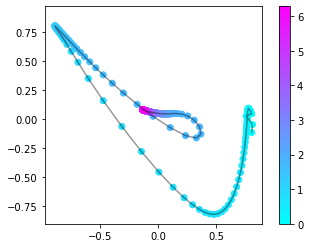

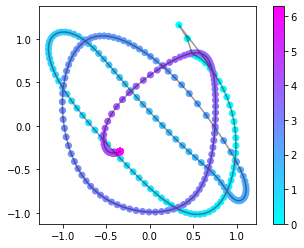

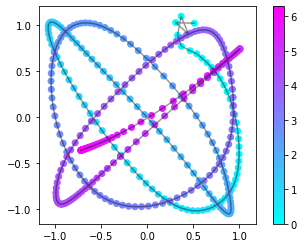

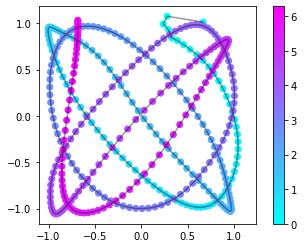

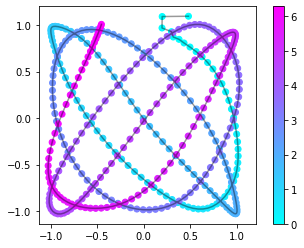

In [290]:
model = DeepRNN()

criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=.01, momentum=0.9)

dataset = CustomDataset(seq_length=8, offset=1)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

model.train()
for e in range(500):
    running_loss = 0
    for b, (x_batched, y_batched) in enumerate(dataloader):
        optimizer.zero_grad()

        # Forward pass
        y_hat = model(x_batched)
        loss = criterion(y_hat, y_batched)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        print(f"[epoch {e+1:>3}] {running_loss/(b+1):.5f}", end='\r')

    if e % 100 == 99:
        with torch.no_grad():
            y_pred = model(x.reshape(1, -1, 1))
            y_pred = y_pred.detach().numpy()
            plt.plot(*y_pred.T, c='black', alpha=.4)
            plt.scatter(*y_pred.T, marker='o', c=x, cmap='cool')
            plt.axis('equal')
            plt.axis('square')
            plt.colorbar()
            plt.show()
        